<a href="https://colab.research.google.com/github/lucvseco/algoritmo-supervisionado/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONTEXTO:**
Iremos analisar as informações de pacientes para prever se um paciente tem ou não chances de desenvolver diabetes. Analisaremos três modelos (Naive Bayes, Random Forest e KNN) para decidir qual o mais eficiente.

# **Importação de bibliotecas**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# **Importação de Dados**

In [ ]:
base_saude = pd.read_csv('/content/diabetes (1).csv', sep=';')
base_saude.head(10)

,sexo,idade,hipertenso,doencaCardio,historicoFumante,imc,nivelAcucar,glicose,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
6,0,44.0,0,0,0,19.31,6.5,200,1
7,0,79.0,0,0,3,23.86,5.7,85,0
8,1,42.0,0,0,0,33.64,4.8,145,0
9,0,32.0,0,0,0,27.32,5.0,100,0


# **Seção 1: Caracterização dos Dados**


In [ ]:
# Distribuição da variável resposta
num_categorias = base_saude['diabetes'].value_counts()
print(num_categorias)

0    91500
1     8500
Name: diabetes, dtype: int64


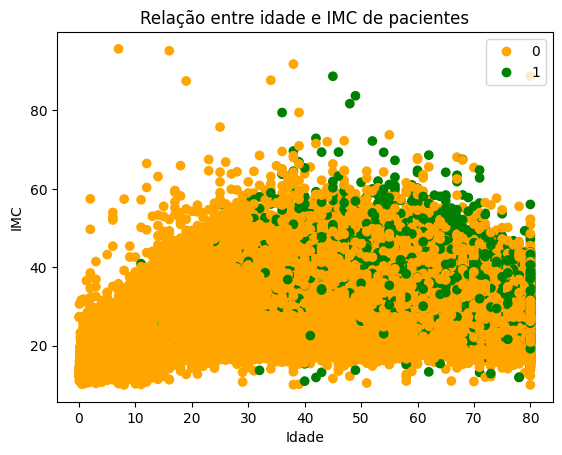

In [ ]:
# Relação entre idade e IMC pela variável resposta
colors = ListedColormap(['orange', 'green'])
scatter = plt.scatter(y = base_saude['imc'], x = base_saude['idade'], c= base_saude['diabetes'] ,  cmap=colors)
plt.title("Relação entre idade e IMC de pacientes")
plt.ylabel("IMC")
plt.xlabel("Idade")
plt.legend(*scatter.legend_elements())
plt.show()

O conjunto de dados é uma coleção de dados médicos juntamente com seu status de diabetes (positivo ou negativo). Os dados incluem características como idade, sexo, índice de massa corporal (IMC), hipertensão, doenças cardíacas, histórico de tabagismo e nível de açúcar no sangue. Esse conjunto de dados pode ser usado para criar modelos de aprendizado de máquina para prever diabetes em pacientes com base em seu histórico médico. Isso pode ser útil para os profissionais de saúde na identificação de pacientes que podem estar em risco de desenvolver zdiabetes e no desenvolvimento de planos de tratamento personalizados.

O objetivo agora é avaliar a performance de modelos  de classificação considerando alguns  pontos:

**Foi determinado que as características (X) que estão altamente relacionadas ao problema, são:**
1. idade
2. existência de hipertensão
3. existência de doença cardiaca
4. ser fumante
5. IMC
6. glicose no sangue

In [ ]:
X = base_saude[['idade','hipertenso','doencaCardio','historicoFumante','imc','glicose']]
Y = base_saude['diabetes']

# **Seção 2: Geração de Modelos de Classificação**





In [ ]:
acuracia_modelo1 = []
acuracia_modelo2 = []
acuracia_modelo3 = []

precisao_modelo1 = []
precisao_modelo2 = []
precisao_modelo3 = []

In [ ]:
np.random.seed(14)

iteracoes = 30
train_size = 0.7

for i in range(iteracoes):

    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, train_size=0.7)

    # Modelo 1 =  Naive Bayes
    model1 = GaussianNB()
    model1.fit(X_treino, Y_treino)

    # Modelo 2 =  Random Forest
    model2 = RandomForestClassifier(n_estimators=50)
    model2.fit(X_treino, Y_treino)

    # Modelo 3 =  KNN
    model3 = KNeighborsClassifier(n_neighbors=9)
    model3.fit(X_treino, Y_treino)

    predictions1 = model1.predict(X_teste)
    acuracia_modelo1.append(accuracy_score(Y_teste, predictions1))
    precisao_modelo1.append(precision_score(Y_teste, predictions1))

    predictions2 = model2.predict(X_teste)
    acuracia_modelo2.append(accuracy_score(Y_teste, predictions2))
    precisao_modelo2.append(precision_score(Y_teste, predictions2))

    predictions3 = model3.predict(X_teste)
    acuracia_modelo3.append(accuracy_score(Y_teste, predictions3))
    precisao_modelo3.append(precision_score(Y_teste, predictions3))



# **Seção 3: Avaliação de Modelos**

In [ ]:
print('Média acurácia modelo 1:')
print(np.round(np.mean(acuracia_modelo1),2))
print('Média acurácia modelo 2:')
print(np.round(np.mean(acuracia_modelo2),2))
print('Média acurácia modelo 3:')
print(np.round(np.mean(acuracia_modelo3),2))

In [ ]:
print('Média precisão modelo 1:')
print(np.round(np.mean(precisao_modelo1),2))
print('Média precisão modelo 2:')
print(np.round(np.mean(precisao_modelo2),2))
print('Média precisão modelo 3:')
print(np.round(np.mean(precisao_modelo3),2))

In [ ]:
dados_resultados_acuracia =[acuracia_modelo1, acuracia_modelo2, acuracia_modelo3]

plt.boxplot(dados_resultados_acuracia)
plt.title("Boxplot da amostra de acerto dos modelos")
plt.show()

In [ ]:
dados_resultados_precisao =[precisao_modelo1, precisao_modelo2, precisao_modelo3]

plt.boxplot(dados_resultados_precisao)
plt.title("Boxplot da amostra de precisão dos modelos para a classe 1")
plt.show()

Analisando as avaliações nos modelos, percebe-se que o
modelo 3 se destaca dentre os demais. A acurácia do modelo 3 foi bastante satisfatória, como também sua eficiência.

Agora, com a ajuda do especialista do problema (médico, profissionais de saúde
em geral) encontramos um modelo/hipótese para resolver o problema de classificação. Esse modelo poderá ser usado pelos especialistas da área de saúde em um sistema diagnóstico.

# **Seção 4: Predição do melhor modelo**

Com base no classificador escolhido na Seção 3, usaremos esse exemplo para classificar se esse paciente desenvolverá diabetes:

idade = 72 anos

Hipertensão  = 1

Doença Cardíaca = 0

Histórico Fumante = 0

IMC = 26.4

Glicose = 230


**Coleta de dados do paciente**

In [ ]:
idade = int(input('Informe a idade do paciente: '))
hipertenso = int(input('Informe se o paciente é hipertenso: '))
doencaCardio = int(input('Informe se o paciente sofre de alguma doença cardíaca: '))
historicoFumante = int(input('Qual o histórico do paciente em relação ao tabagismo: '))
imc = float(input('Informe o IMC do paciente: '))
glicose = int(input('Indique a glicose: '))


**Resposta do sistema**

In [18]:
novo_paciente = [[idade, hipertenso, doencaCardio, historicoFumante, imc, glicose]]
variaveis = ['idade','hipertenso', 'doencaCardio','historicoFumante','imc','glicose']
novo_paciente =  pd.DataFrame(novo_paciente, columns = variaveis)
resposta = model3.predict(novo_paciente)

for i in range(len(resposta)):
  if resposta[i] == 1.0 :
    print('Desenvolverá diabetes')
  else:
    print('Não desenvolverá diabetes')

Desenvolverá diabetes
